<a href="https://colab.research.google.com/github/hdpark1208/StudyCode/blob/main/7)%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***4-1 로지스틱 회귀***

# **줄거리**
1.    판다스를 이용해 5종류의 생선과 생선의 5가지 특성을 지니는 데이터를 불러온다

2.    판다스의 여러 함수를 이용하여 데이터를 출력해본다  

3.    판다스 시리즈, 데이터프레임을 이해하고 그 데이터를 넘파이 ndarray로 변환한다  

4.    훈련/테스트 세트를 나누고 표준화 한다  

5.    KNeighborsClassifier 모델을 이용해 결과를 확인해보고 다중분류에서는 타겟 데이터를 어떻게 다루는 알아본다  

6.    KNeighborsClassifier 모델이 결과를 어떻게 도출했는지 알아본다  

7.    로지스틱 회귀와 시그모이드 함수에 대해 알아본다  

8.    불리언 인덱싱을 통해 필요 데이터 추출하는 방법을 알아본다  

9.    다중 분류에서의 로지스틱 회귀와 소프트맥스 함수에 대해 알아본다  



#Note
* 로지스틱 회귀 : 선형방정식을 사용한 분류 알고리즘. 선형 회귀와 달리 시그모이드 함수나 소프트맥스 함수를 사용하여 클래스 확률을 출력할 수 있다  
회귀함수를 구하여 시그모이드 함수(z값)에 대입해서 분류한다 (분류모델이지만 회귀라고 불리우는 이유)

* 다중 분류 : 타겟 클래스가 2개 이상인 분류 문제

* 시그모이드 함수 : 선형 방정식의 출력을 0~1 사이의 값으로 압출. 이진분류에서 사용

* 소프트맥스 함수 : 여러 선형 방정식의 출력 결과를 정규화하여 합이 1이 되도록 만듬. 다중분류에서 사용



##사이킷런
* LogisticRegression : 선형 분류 알고리즘인 로지스틱 회귀를 위한 클래스
>C - 규제의 강도를 제어 default = 1  
predict_proba() : 예측 확률을 반환  
coef_ : 로지스틱 회귀 모델이 학습한 선형 방정식의 계수  
decision_function() : 모델이 학습한 선형 방정식의 값(z)을 반환

#**코드**


In [ ]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
print(fish.head())
print("")
print(fish.columns)

  Species  Weight  Length  Diagonal   Height   Width
0   Bream   242.0    25.4      30.0  11.5200  4.0200
1   Bream   290.0    26.3      31.2  12.4800  4.3056
2   Bream   340.0    26.5      31.1  12.3778  4.6961
3   Bream   363.0    29.0      33.5  12.7300  4.4555
4   Bream   430.0    29.0      34.0  12.4440  5.1340

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')


In [ ]:
print(pd.unique(fish['Species']))    #생선 종류 확인을 위해 'Species' 열에서 고유한 값 추출

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

print(fish_input[:5])    #Pandas 의 head() 기능

fish_target = fish['Species'].to_numpy()

print(fish_target[:5])
print(type(fish['Species']),type(fish[['Weight','Length','Diagonal','Height','Width']]))
print(type(fish_input),type(fish_target))


[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]
['Bream' 'Bream' 'Bream' 'Bream' 'Bream']
<class 'pandas.core.series.Series'> <class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input,fish_target,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled,train_target))
print(kn.score(test_scaled,test_target))


0.8907563025210085
0.85


In [ ]:
print(pd.unique(train_target))    #타겟데이터 종류 확인

print(kn.classes_)    #알파벳 순으로 정렬

['Bream' 'Pike' 'Smelt' 'Perch' 'Parkki' 'Roach' 'Whitefish']
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
kn.predict(test_scaled)    # 이 판단의 근거는 무엇일까?

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch', 'Bream', 'Smelt',
       'Roach', 'Perch', 'Pike', 'Bream', 'Perch', 'Bream', 'Parkki',
       'Bream', 'Bream', 'Perch', 'Perch', 'Roach', 'Bream', 'Smelt',
       'Bream', 'Bream', 'Bream', 'Bream', 'Perch', 'Perch', 'Perch',
       'Smelt', 'Smelt', 'Pike', 'Perch', 'Roach', 'Pike', 'Bream',
       'Perch', 'Roach', 'Perch', 'Parkki', 'Perch'], dtype=object)

In [ ]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])

print(kn.classes_)    #열 확인
print("")
print(np.round(proba, decimals=4))    #소수점 네 번째 자리까지 표기
print("")
print(kn.predict(test_scaled[:5]))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [ ]:
distances, indexes = kn.kneighbors(test_scaled[3:4])    #네 번째 샘플의 최근접 이웃의 클래스. kneighbors() 의 입력은 2차원 배열이여야하기 때문에 test_scaled[3:4] 으로 했다. test_scaled[3] 으로 할 경우 에러가 난다.
print(train_target[indexes])    #네 번째 샘플의 이웃, 위의 predict 의 근거를 확인 할 수 있다.

[['Roach' 'Perch' 'Perch']]


로지스틱 회귀

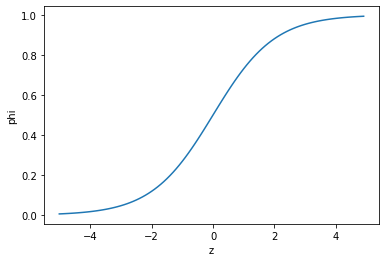

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5,5,0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z,phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [ ]:
char_arr = np.array(['A','B','C','D','E'])
print(char_arr[[[True, False, True,False,False]]])    #불리언 인덱싱(boolean indexing)

['A' 'C']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


이진분류


In [ ]:
bream_smelt_indexes = (train_target=='Bream')|(train_target=='Smelt')    #도미, 빙어 행만 골라내기위해 해당 인덱스 추출
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]
print(train_target=='Bream')    #도미일 경우 True 아니면 False 를 반환한 배열
print(bream_smelt_indexes)    #or 연산을 통해 도미나 빙어일 경우 True 그 외엔 False
print(train_bream_smelt)    #불리언 인덱싱. 도미나와 빙어 데이터만 골라내기
print(target_bream_smelt)


[ True False False False False False False  True False False False  True
 False False False  True False False False  True False  True False False
 False  True False False  True False False False False  True False False
  True  True False False False False False False False False False False
 False  True False False False False False False False False  True False
 False False False False False  True False  True False False False False
 False False False False False  True False  True False False  True  True
 False False False  True False False False False False False False False
 False  True False False False False False  True False False False False
 False False False False False  True False False  True False False]
[ True False  True False False False False  True False False False  True
 False False False  True  True False False  True False  True False False
 False  True False False  True False False False False  True False False
  True  True False False False False False  True False F

In [ ]:
# for i in range(len(target_bream_smelt)):    #타겟데이터를 바꿔보았다
#   if target_bream_smelt[i]=='Bream':
#     target_bream_smelt[i]='1'
#   else:
#     target_bream_smelt[i]='0'
# print(target_bream_smelt)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt,target_bream_smelt)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(lr.classes_)    #첫 번째 열 : 음성 클래스(0)에 대한 확률, 두 번째 열 : 양성 클래스(1)에 대한 확률. 현재 이진 분류이므로 0.5 전후 로 판단한다.
print(lr.predict_proba(train_bream_smelt[:5]))    #밑의 predict 값의 근거
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt']
[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]
['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [ ]:
print(lr.coef_, lr.intercept_)    #학습한 계수 확인 z = lr.coef_[0]*(weight) + lr.coef_[1]*(Length) + lr.coef_[2]*(Diagonal) + lr.coef_[3]*(Height) + lr.coef_[4]*(Width) + lr.intercept_

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [ ]:
decision = lr.decision_function(train_bream_smelt[:5])    #처음 5개 샘플의 (양성 클래스에 대한)z 값. 이 z 값을 시그모이드 함수에 통과시키면 확률을 얻을 수 있다.
print(decision)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [ ]:
from scipy.special import expit
print(expit(decision))    #사이파이 라이브러리의 시그모이드 함수
print(lr.predict_proba(train_bream_smelt[:5]))    #확인해보기

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]
[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


다중 분류

In [ ]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))


0.9327731092436975
0.925


In [ ]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [ ]:
proba = lr.predict_proba(test_scaled[:5])    #앞의 5개 샘플에 대한 예측 확률. 7종의 생선에 대한 확률 
print(np.round(proba,decimals=3))
print("")
print(lr.classes_)    #위의 결과와 비교


[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
print(lr.coef_)
print("")
print(lr.intercept_)

[[-1.49002911 -1.02919221  2.59351113  7.70354318 -1.20068079]
 [ 0.19619256 -2.0106062  -3.77982687  6.50490143 -1.99486463]
 [ 3.56278472  6.34361428 -8.48973364 -5.75756295  3.79309039]
 [-0.10458533  3.60316654  3.93067417 -3.61731229 -1.75070607]
 [-1.40059104 -6.07505264  5.25967743 -0.87222909  1.86043657]
 [-1.38528628  1.49217379  1.3922839  -5.67732641 -4.40095877]
 [ 0.62151448 -2.32410356 -0.90658611  1.71598614  3.69368329]]

[-0.09204845 -0.26290731  3.25101057 -0.14742485  2.65496057 -6.78780765
  1.38421712]


In [ ]:
#다중 분류는 클래스마다 z 값을 하나씩 계산하고 가장 높은 z 값을 출력하는 클래스가 예측 클래스가 된다.
#이진분류에서는 시그모이드 함수를 사용해 z를 0과 1 사이의 값으로 변환했으나 다중분류에서는 소프트맥스 함수를 사용하여 z 값을 확률로 변환한다.
#시그모이드 함수는 하나의 선형 방정식의 출력값(z)을 0~1 사이로 압축한다.
#이와달리 소프트맥스는 여러 개의 선형 방정식의 출력값(z)을 0~1 사이로 압축하고 전체 합이 1이 되도록 만든다. 이를 위해 자수 함수를 사용하기때문에 정규화된 지수 함수 라고도 부른다

In [ ]:
decision = lr.decision_function(test_scaled[:5])    #5개의 샘플에 대한 z1~z7 값
print(np.round(decision,decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [ ]:
from scipy.special import softmax
proba = softmax(decision, axis = 1)
print(np.round(proba,decimals=3))    #직접 구하기
print("")
print(np.round(proba,decimals=3))    #비교


[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
